In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [2]:
circuit = QuantumCircuit(2,1)

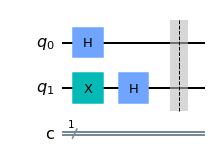

In [3]:
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.draw(output='mpl')

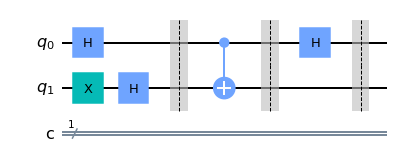

In [4]:
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

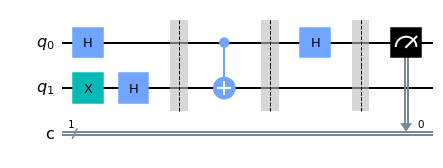

In [5]:
circuit.measure(0,0)
circuit.draw(output='mpl')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


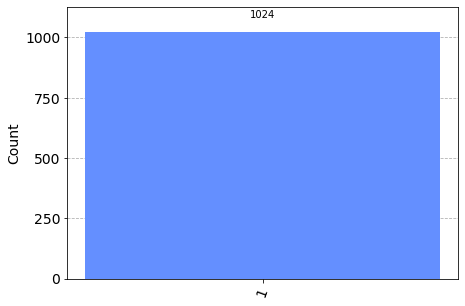

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator,shots=1024).result()
counts = result.get_counts(circuit)

plot_histogram(counts)

In [7]:
#real quantum computer
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
provider = IBMQ.get_provider("ibm-q")
provider.backends()   # current Quantum Computers

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [9]:
for backend in provider.backends():
    try:
        qubitCount = len(backend.properties().qubits)
    except:
        qubitCount = "simulated"
    print(f"{backend.name()} : {backend.status().pending_jobs} & {qubitCount} qubits") # quantum com name and qubit count and queuq(backend.status().pending_jobs)

ibmq_qasm_simulator : 0 & simulated qubits
ibmq_lima : 5 & 5 qubits
ibmq_belem : 2 & 5 qubits
ibmq_quito : 83 & 5 qubits
simulator_statevector : 1 & simulated qubits
simulator_mps : 1 & simulated qubits
simulator_extended_stabilizer : 1 & simulated qubits
simulator_stabilizer : 1 & simulated qubits
ibmq_manila : 1 & 5 qubits
ibm_nairobi : 20 & 7 qubits
ibm_oslo : 0 & 7 qubits


In [10]:
quantumComputer = provider.get_backend("ibmq_belem")

In [11]:
quantum_result = execute(circuit,backend=quantumComputer,shots=1024).result()

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

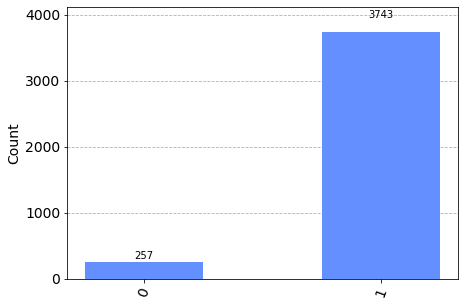

In [12]:

import qiskit.tools.jupyter
%qiskit_job_watcher #durumun ne olduğunu gösteriyo

job = execute(circuit,backend=quantumComputer)

quantum_result = job.result()
plot_histogram(quantum_result.get_counts(circuit))

In [13]:
%qiskit_disable_job_watcher